# Module 21: Gradient Boosting (Practice Notebook)
## Classification Task with TODO Blocks

In this practice notebook, you will implement **Gradient Boosting for classification** step by step.

### Learning Objectives
- Understand how Gradient Boosting works for classification
- Practice model training, prediction, and evaluation
- Explore the effect of key hyperparameters

**Important:** Complete all TODO blocks. Do not skip steps.


## Step 1: Import Required Libraries

**TODO:** Import NumPy, Pandas, Matplotlib, and required scikit-learn modules.

In [2]:
# TODO: Import necessary libraries
# Hint: numpy, pandas, matplotlib.pyplot
# Hint: load dataset, train_test_split, GradientBoostingClassifier, metrics
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import scikit-learn modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# Set matplotlib style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')


## Step 2: Load Dataset

We will use the **Breast Cancer Wisconsin dataset**, a standard binary classification dataset.

**TODO:** Load the dataset and separate features (X) and target (y).

In [4]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Separate features (X) and target (y)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = malignant, 1 = benign

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Step 3: Inspect the Data

**TODO:** Display the first few rows of X and the distribution of y.

First 5 rows of the feature matrix:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst text

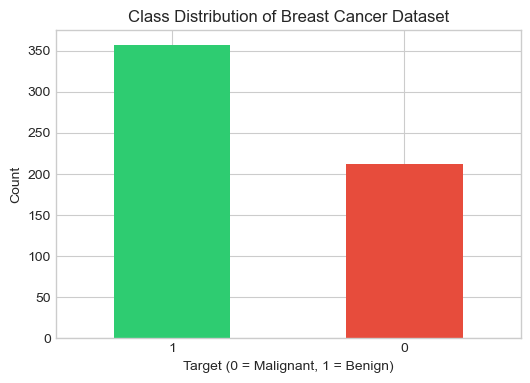

In [10]:
# Display first 5 rows of features (X)
print("First 5 rows of the feature matrix:")
print(X.head(), "\n")

# Check class distribution in target (y)
class_dist = y.value_counts(normalize=True).round(3) * 100
print("Class Distribution (Target Variable):")
print(f"Benign (1): {class_dist[1]}%")
print(f"Malignant (0): {class_dist[0]}%")

# Visualize class distribution
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution of Breast Cancer Dataset')
plt.xlabel('Target (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Step 4: Train-Test Split

**TODO:** Split the dataset into training and testing sets.
- Use 80% data for training
- Set random_state for reproducibility

In [11]:
# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    random_state=42,  # Reproducibility
    stratify=y  # Preserve class distribution in splits
)

print(f"Training set size: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set size: X={X_test.shape}, y={y_test.shape}")

Training set size: X=(455, 30), y=(455,)
Testing set size: X=(114, 30), y=(114,)


## Step 5: Train Gradient Boosting Classifier

**TODO:** Initialize and train a GradientBoostingClassifier.

Suggested starting values:
- n_estimators = 100
- learning_rate = 0.1
- max_depth = 3

In [12]:
# Initialize Gradient Boosting Classifier with suggested hyperparameters
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model on the training data
gb_classifier.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


## Step 6: Make Predictions

**TODO:** Predict class labels and class probabilities for the test set.

In [13]:
# Predict class labels (0 or 1) for the test set
y_pred = gb_classifier.predict(X_test)

# Predict class probabilities (probability of being 0 or 1)
y_pred_proba = gb_classifier.predict_proba(X_test)

# Display sample predictions and probabilities
print("Sample Predictions (Class Labels):", y_pred[:10])
print("Sample Prediction Probabilities (Malignant, Benign):")
print(np.round(y_pred_proba[:10], 3))

Sample Predictions (Class Labels): [0 1 0 0 0 1 1 0 0 0]
Sample Prediction Probabilities (Malignant, Benign):
[[1.    0.   ]
 [0.    1.   ]
 [0.997 0.003]
 [0.876 0.124]
 [1.    0.   ]
 [0.001 0.999]
 [0.    1.   ]
 [1.    0.   ]
 [0.999 0.001]
 [1.    0.   ]]


## Step 7: Model Evaluation

**TODO:** Evaluate the model using:
- Accuracy
- Confusion Matrix
- Classification Report

Model Accuracy: 0.9561

Confusion Matrix:
[[38  4]
 [ 1 71]] 

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



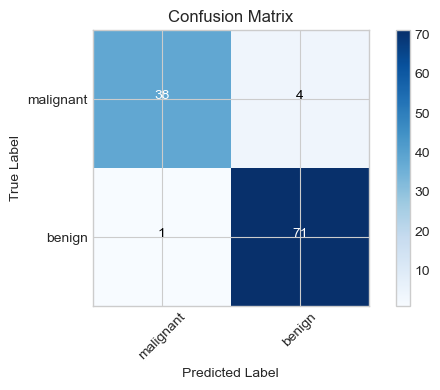

In [14]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")

# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix, "\n")

# Print classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)

# Add text annotations to confusion matrix cells
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## Step 8: Effect of Learning Rate (Experiment)

**TODO:** Train multiple models with different learning rates and compare accuracy.

Suggested learning rates: 0.01, 0.05, 0.1, 0.2

Effect of Learning Rate on Model Accuracy:
   Learning Rate  Test Accuracy
0           0.01         0.9211
1           0.05         0.9474
2           0.10         0.9561
3           0.20         0.9561 



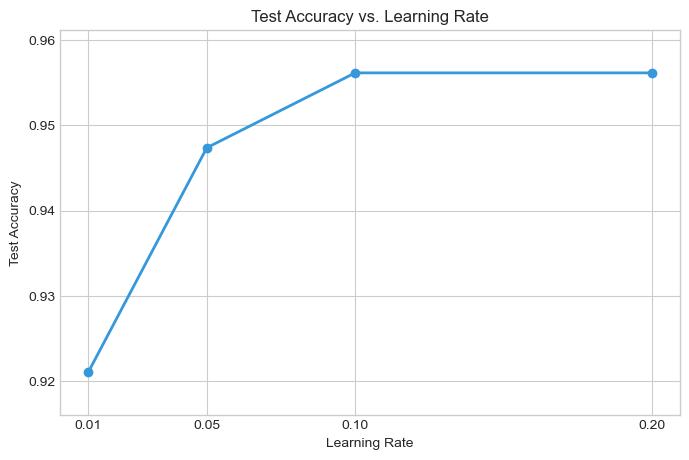

In [15]:
# Define learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.2]
lr_accuracies = []

# Loop over different learning rates and train models
for lr in learning_rates:
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred_lr = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_lr)
    lr_accuracies.append(acc)

# Create results table
lr_results = pd.DataFrame({
    'Learning Rate': learning_rates,
    'Test Accuracy': [round(acc, 4) for acc in lr_accuracies]
})

print("Effect of Learning Rate on Model Accuracy:")
print(lr_results, "\n")

# Visualize results
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, lr_accuracies, marker='o', linewidth=2, color='#3498db')
plt.title('Test Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(learning_rates)
plt.ylim(min(lr_accuracies) - 0.005, max(lr_accuracies) + 0.005)
plt.show()

## Step 9: Effect of Tree Depth (Experiment)

**TODO:** Compare model performance for different tree depths.

Suggested depths: 1, 2, 3, 5

Effect of Tree Depth on Model Accuracy:
   Max Tree Depth  Test Accuracy
0               1         0.9561
1               2         0.9474
2               3         0.9561
3               5         0.9386 



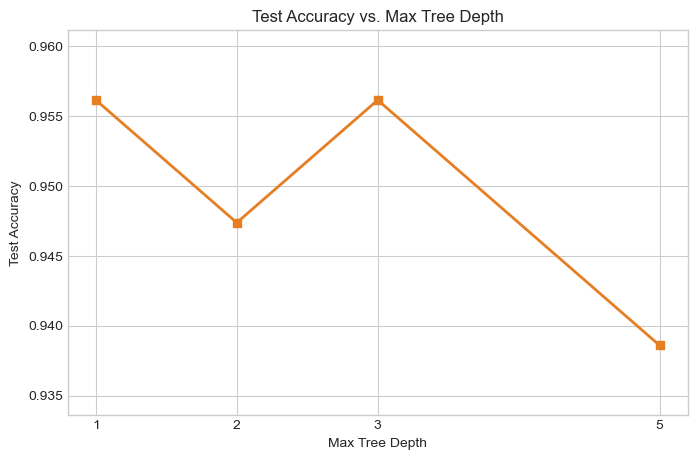

In [16]:
# Define max_depth values to test
max_depths = [1, 2, 3, 5]
depth_accuracies = []

# Loop over different tree depths and train models
for depth in max_depths:
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=depth,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred_depth = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_depth)
    depth_accuracies.append(acc)

# Create results table
depth_results = pd.DataFrame({
    'Max Tree Depth': max_depths,
    'Test Accuracy': [round(acc, 4) for acc in depth_accuracies]
})

print("Effect of Tree Depth on Model Accuracy:")
print(depth_results, "\n")

# Visualize results
plt.figure(figsize=(8, 5))
plt.plot(max_depths, depth_accuracies, marker='s', linewidth=2, color='#e67e22')
plt.title('Test Accuracy vs. Max Tree Depth')
plt.xlabel('Max Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(max_depths)
plt.ylim(min(depth_accuracies) - 0.005, max(depth_accuracies) + 0.005)
plt.show()

## Step 10: Feature Importance

**TODO:** Extract and display the top 10 most important features.

Top 10 Most Important Features:
                 Feature  Importance
20          worst radius    0.435500
22       worst perimeter    0.271483
27  worst concave points    0.106549
21         worst texture    0.052638
7    mean concave points    0.030458
11         texture error    0.026927
23            worst area    0.022313
26       worst concavity    0.010819
24      worst smoothness    0.010706
13            area error    0.005348 



<Figure size 1000x600 with 0 Axes>

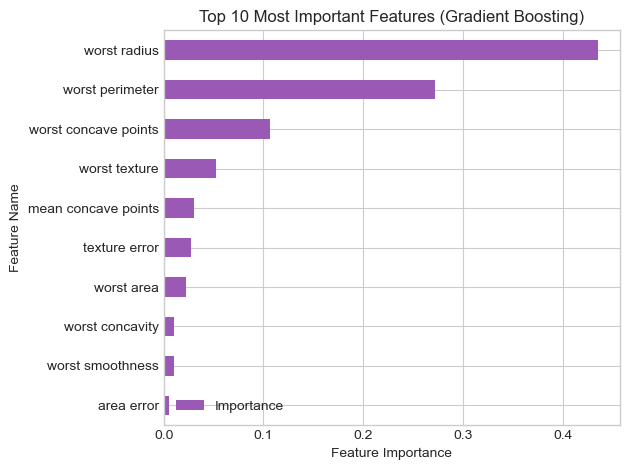

In [17]:
# Extract feature importances from the trained model (Step 5)
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance and get top 10 features
top10_features = feature_importance_df.sort_values('Importance', ascending=False).head(10)

print("Top 10 Most Important Features:")
print(top10_features, "\n")

# Visualize top 10 features
plt.figure(figsize=(10, 6))
top10_features.sort_values('Importance').plot(
    kind='barh', 
    x='Feature', 
    y='Importance', 
    color='#9b59b6'
)
plt.title('Top 10 Most Important Features (Gradient Boosting)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

## Reflection Questions (Answer in Markdown)

1. How does learning rate affect model performance?
2. Why does Gradient Boosting prefer shallow trees?
3. When might Gradient Boosting overfit?
4. Compare this model conceptually with Random Forest.
